In [37]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from scipy.stats import pointbiserialr, pearsonr, spearmanr

import seaborn as sns 

from tqdm import tqdm
from gtfparse import read_gtf
import anndata as ad

from preprocessing.make_train_dataset import (
    filter_zero_median, 
    filter_correlated,
    filter_cv_q34,
    filter_cv_threshold,
    filter_median_q34,
    filter_correlated,
    logarithmization, 
)

from config import FDIR_EXTERNAL, FDIR_RAW, FDIR_PROCESSED, FDIR_INTEMEDIATE


In [2]:
# fdir_raw = Path("../data/raw/")
# fdir_processed = Path("../data/interim")
# fdir_traintest = Path("../data/processed")
# fdir_external = Path("../data/external")


In [3]:
transcript_names = [
    "ENST00000381077.10",
    "ENST00000381042.9",
    "ENST00000316084.10",
    "ENST00000379607.10",
    "ENST00000483219.1",
    "ENST00000517322.1",
    "ENST00000458402.1",
    "ENST00000446897.1",
    "ENST00000477670.1",
    "ENST00000477670.1",
    "ENST00000479057.1",
    "ENST00000334186.9",
    "ENST00000538173.2",
    "ENST00000600059.6",
    "ENST00000658774.1",
    "ENST00000690288.1",
    "ENST00000285605.8",
    "ENST00000234313.8",
    "ENST00000284202.9",
    "ENST00000624016.1",
    "ENST00000348931.9",
    "ENST00000321753.8",
    "ENST00000243662.11",
    "ENST00000432648.8",
    "ENST00000320623.10",
    "ENST00000370336.5",
    "ENST00000649246.1",
    "ENST00000466174.5",
    "ENST00000661656.1",
    "ENST00000573866.2",
]

In [4]:
def read_dataset(fname_data: Path | str,
                 fname_header: Path | str,
                 fname_gtf: Path | str,
                 separator=','):
    data_raw = pd.read_csv(fname_data, index_col=0, sep=separator).T
    data_raw = data_raw.astype(np.float32)

    data_header = pd.read_csv(fname_header, index_col=0, sep=',')

    gtf_rawdata = read_gtf(fname_gtf)
    gtf_data = gtf_rawdata.to_pandas()
    gtf_data = gtf_data.set_index('transcript_id')
    gtf_data['transcript_id'] = gtf_data.index

    gtf_data = gtf_data.drop_duplicates("transcript_id")

    print('Dataset shape: ', data_raw.shape)

    return data_raw, data_header, gtf_data

In [5]:
dataset_name = 'geuvadis'
adata = ad.read_h5ad(FDIR_INTEMEDIATE / f'{dataset_name.upper()}.raw.h5ad')

In [6]:
adata.var_names.intersection(transcript_names).shape, len(transcript_names)

((29,), 30)

In [7]:
datasets = {}
categories = adata.obs['sex'].unique()
for category in categories:
    datasets[category] = adata.to_df()[adata.obs['sex'] == category]

In [8]:
data_F = logarithmization.__wrapped__(datasets['F'])
data_M = logarithmization.__wrapped__(datasets['M'])
data_TOT = logarithmization.__wrapped__(adata.to_df())


In [9]:
data_F

,ENST00000378604.3,ENST00000307786.8,ENST00000482402.1,ENST00000462293.1,ENST00000378602.3,ENST00000310991.8,ENST00000378598.4,ENST00000470931.2,ENST00000602604.1,ENST00000416272.1,...,ENST00000426199.1,ENST00000517139.1,MSTRG.36845.1,ENST00000619329.1,ENST00000258589.8,ENST00000420810.1,ENST00000431853.1,ENST00000711259.1,ENST00000711266.1,ENST00000711267.1
ERR188021,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
ERR188023,0.000000,0.225495,0.156255,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.02050,0.0,0.000000,0.000000,0.000000,0.000000
ERR188024,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.285853,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
ERR188025,0.000000,0.147227,0.025524,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
ERR188105,0.137521,0.000000,0.173378,0.0,0.216271,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR204856,0.000000,0.000000,0.256438,0.0,0.520743,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
ERR204857,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
ERR204938,0.000000,0.000000,0.244450,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
ERR204940,2.833388,0.000000,2.500878,0.0,2.541978,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.23978,0.0,5.918033,1.890887,2.034017,3.346222


In [23]:
data_report = pd.DataFrame(data=np.zeros((len(data_F.columns), 4)),
                           index=data_F.columns, 
                           columns=["F_mean", "M_mean", "F_std", "M_std"])
data_report['F_mean'] = data_F.mean(axis=0)
data_report['M_mean'] = data_M.mean(axis=0)
data_report['F_std'] = data_F.std(axis=0)
data_report['M_std'] = data_M.std(axis=0)

data_report['ALL_mean'] = data_TOT.mean()
data_report['ALL_std'] = data_TOT.std()

data_report['ALL_CV'] = data_TOT.std() / data_TOT.mean()



In [33]:
data_report['F_mean'].median()
data_report['M_mean'].median()

(data_report['ALL_CV'] > data_report['ALL_CV'].median()).loc[transcript_names]

ENST00000381077.10    False
ENST00000381042.9     False
ENST00000316084.10    False
ENST00000379607.10    False
ENST00000483219.1     False
ENST00000517322.1     False
ENST00000458402.1     False
ENST00000446897.1     False
ENST00000477670.1     False
ENST00000477670.1     False
ENST00000479057.1     False
ENST00000334186.9     False
ENST00000538173.2     False
ENST00000600059.6     False
ENST00000658774.1      True
ENST00000690288.1     False
ENST00000285605.8     False
ENST00000234313.8     False
ENST00000284202.9     False
ENST00000624016.1     False
ENST00000348931.9     False
ENST00000321753.8     False
ENST00000243662.11    False
ENST00000432648.8     False
ENST00000320623.10    False
ENST00000370336.5     False
ENST00000649246.1     False
ENST00000466174.5     False
ENST00000661656.1     False
ENST00000573866.2     False
Name: ALL_CV, dtype: bool

<Axes: xlabel='value', ylabel='Count'>

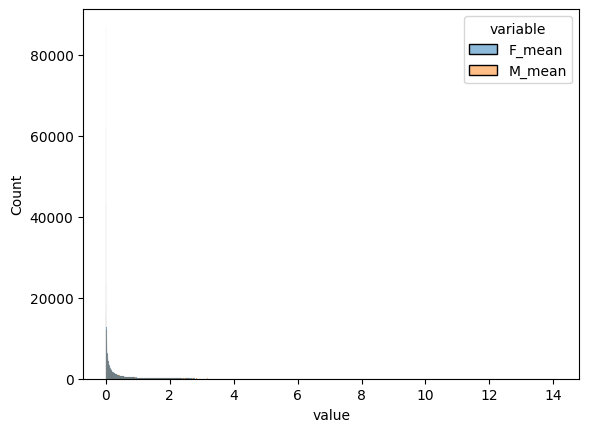

In [61]:
sns.histplot(data=data_report[['F_mean', 'M_mean']].melt(), x='value', hue='variable')
# sns.histplot(data=data_report, x='F_mean')

In [52]:
data_report[['F_mean', 'M_mean']].melt()

,variable,value
0,F_mean,0.059837
1,F_mean,0.023985
2,F_mean,0.090866
3,F_mean,0.000558
4,F_mean,0.168570
...,...,...
677445,M_mean,0.022566
677446,M_mean,0.001219
677447,M_mean,0.000000
677448,M_mean,0.002568
